In [6]:
import pandas as pd
import numpy as np

df=pd.read_csv("wallacecommunications.csv")

In [7]:
targetName="new_contract_this_campaign"
allFeatureNames=df.columns[df.columns != targetName]
X = df[allFeatureNames]
y = df[targetName]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=402)

In [9]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [10]:
X_train_cleaned = X_train[(X_train.country=="UK") & (X_train.last_contact_this_campaign_month!="j")]
y_train_cleaned = y_train[(X_train.country=="UK") & (X_train.last_contact_this_campaign_month!="j")] 

X_train_cleaned = X_train_cleaned.reset_index(drop=True)
y_train_cleaned = y_train_cleaned.reset_index(drop=True)

selected_features = ['job','married','education','arrears','current_balance','housing',
                     'has_tv_package','last_contact','conn_tr','last_contact_this_campaign_day','last_contact_this_campaign_month','this_campaign','days_since_last_contact_previous_campaign','contacted_during_previous_campaign','outcome_previous_campaign','age']

X_train_cleaned = X_train_cleaned[selected_features]

X_train_cleaned['has_tv_package'] = X_train_cleaned['has_tv_package'].replace({'n':'no'})
X_train_cleaned['last_contact'] = X_train_cleaned['last_contact'].replace({'cell':'cellular'})

In [11]:
numerical_ix = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X_train_cleaned.select_dtypes(include=['object', 'bool']).columns

numerical_ix

Index(['current_balance', 'conn_tr', 'last_contact_this_campaign_day',
       'this_campaign', 'days_since_last_contact_previous_campaign',
       'contacted_during_previous_campaign', 'age'],
      dtype='object')

In [12]:
categorical_ix

Index(['job', 'married', 'education', 'arrears', 'housing', 'has_tv_package',
       'last_contact', 'last_contact_this_campaign_month',
       'outcome_previous_campaign'],
      dtype='object')

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

t = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

col_transform.fit(X_train_cleaned)

X_train_encoded = col_transform.transform(X_train_cleaned)

X_dense = X_train_encoded.toarray()
print(X_dense)

[[0.         0.         0.         ... 0.         0.         0.38961039]
 [0.         0.         0.         ... 0.         0.         0.46753247]
 [0.         0.         0.         ... 0.22477064 0.01454545 0.63636364]
 ...
 [0.         0.         0.         ... 0.42545872 0.00363636 0.16883117]
 [0.         0.         0.         ... 0.50458716 0.00363636 0.28571429]
 [0.         0.         0.         ... 0.         0.         0.16883117]]


In [14]:
X_df = pd.DataFrame(X_dense, columns=col_transform.get_feature_names_out())

In [15]:
df_grouped = pd.concat([X_df, y_train_cleaned], axis=1)
df_grouped

,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,cat__job_retired,cat__job_self-employed,cat__job_services,cat__job_student,cat__job_technician,cat__job_unemployed,...,cat__outcome_previous_campaign_success,cat__outcome_previous_campaign_unknown,num__current_balance,num__conn_tr,num__last_contact_this_campaign_day,num__this_campaign,num__days_since_last_contact_previous_campaign,num__contacted_during_previous_campaign,num__age,new_contract_this_campaign
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.096603,0.25,0.933333,0.016129,0.000000,0.000000,0.389610,yes
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.077248,0.75,0.666667,0.000000,0.000000,0.000000,0.467532,no
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.094583,0.50,0.500000,0.064516,0.224771,0.014545,0.636364,yes
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.077060,0.75,0.466667,0.048387,0.000000,0.000000,0.207792,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.106590,1.00,0.666667,0.000000,0.000000,0.000000,0.246753,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35454,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.075557,1.00,0.633333,0.080645,0.000000,0.000000,0.519481,no
35455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.073791,0.75,0.266667,0.000000,0.000000,0.000000,0.454545,no
35456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.078977,1.00,0.400000,0.016129,0.425459,0.003636,0.168831,no
35457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.117986,0.25,0.400000,0.032258,0.504587,0.003636,0.285714,yes


In [16]:
df_grouped.columns

Index(['cat__job_blue-collar', 'cat__job_entrepreneur', 'cat__job_housemaid',
       'cat__job_management', 'cat__job_retired', 'cat__job_self-employed',
       'cat__job_services', 'cat__job_student', 'cat__job_technician',
       'cat__job_unemployed', 'cat__job_unknown', 'cat__married_married',
       'cat__married_single', 'cat__education_secondary',
       'cat__education_tertiary', 'cat__education_unknown', 'cat__arrears_yes',
       'cat__housing_yes', 'cat__has_tv_package_yes',
       'cat__last_contact_telephone', 'cat__last_contact_unknown',
       'cat__last_contact_this_campaign_month_aug',
       'cat__last_contact_this_campaign_month_dec',
       'cat__last_contact_this_campaign_month_feb',
       'cat__last_contact_this_campaign_month_jan',
       'cat__last_contact_this_campaign_month_jul',
       'cat__last_contact_this_campaign_month_jun',
       'cat__last_contact_this_campaign_month_mar',
       'cat__last_contact_this_campaign_month_may',
       'cat__last_contact_

In [17]:
targetName= "new_contract_this_campaign"
FeatureNames=df_grouped.columns[df_grouped.columns != targetName]
X_final = df_grouped[FeatureNames]
y_final = df_grouped[targetName]

C:\Users\Admin\AppData\Local\Temp\ipykernel_8652\3002049289.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped_oversampled = g.apply(lambda x: x.sample(g.size().max(), replace=True)).reset_index(drop=True)


<Axes: xlabel='new_contract_this_campaign'>

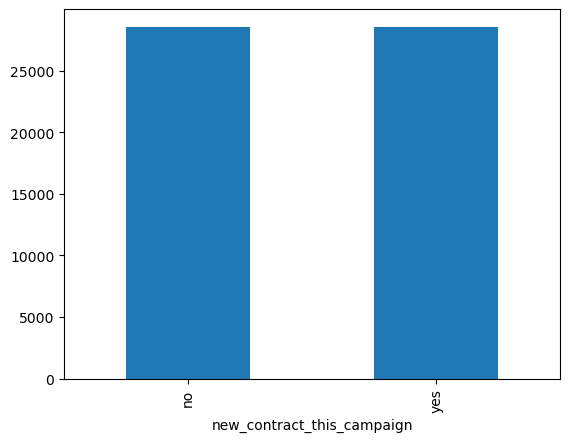

In [18]:
g = df_grouped.groupby(targetName)
df_grouped_oversampled = g.apply(lambda x: x.sample(g.size().max(), replace=True)).reset_index(drop=True)

X_final_oversampled = df_grouped_oversampled[FeatureNames]
y_final_oversampled = df_grouped_oversampled[targetName]

y_final_oversampled.value_counts().plot(kind='bar')

In [20]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_final_oversampled, y_final_oversampled)

In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(tree_clf, X_final_oversampled, y_final_oversampled, cv=5)

print("cv_scores mean: {}".format(np.mean(cv_scores)))

cv_scores mean: 0.9555209390384171


In [23]:
from sklearn.ensemble import RandomForestClassifier

rand_forest_clf = RandomForestClassifier(n_estimators=50, random_state=1)
rand_forest_clf.fit(X_final_oversampled, y_final_oversampled)

RandomForestClassifier(n_estimators=50, random_state=1)

In [24]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=1)
adaboost_clf.fit(X_final_oversampled, y_final_oversampled)

AdaBoostClassifier(random_state=1)

In [25]:
tree_cv_scores = cross_val_score(tree_clf, X_final_oversampled, y_final_oversampled, cv=5)
rand_forest_cv_scores = cross_val_score(rand_forest_clf, X_final_oversampled, y_final_oversampled, cv=5)
adaboost_cv_scores = cross_val_score(adaboost_clf, X_final_oversampled, y_final_oversampled, cv=5)

print("Decision Tree CV Score: {}".format(np.mean(tree_cv_scores)))
print("Random Forest CV Score: {}".format(np.mean(rand_forest_cv_scores)))
print("Adaboost CV Score:      {}".format(np.mean(adaboost_cv_scores)))

Decision Tree CV Score: 0.9556259611366607
Random Forest CV Score: 0.9789420205979606
Adaboost CV Score:      0.7180891873538067


In [26]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver='adam', hidden_layer_sizes=(10), max_iter=2000, activation='logistic')

mlp_model.fit(X_final_oversampled, y_final_oversampled)

MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=2000)

In [27]:
mlp_cv_scores = cross_val_score(mlp_model, X_final_oversampled, y_final_oversampled, cv=5)

In [28]:
print("MLP CV Score: {}".format(np.mean(mlp_cv_scores)))

MLP CV Score: 0.7342107987426274


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [(50),(100),(300),(700)],
              "min_samples_split": [(2),(5),(10),(20)],
              "max_features": [0.3,0.5,None]}

grid = GridSearchCV(rand_forest_clf, param_grid, cv=5, n_jobs=1,verbose=2).fit(X_final_oversampled, y_final_oversampled)
randforest_model_tuned=grid.best_estimator_

In [ ]:
randforest_model_tuned=grid.best_estimator_
print("Best Hyperparameters found: " + str(grid.best_params_))
print("Cross Validation accuracy: " + str(randforest_tuned.score(X_final_oversampled,y_final_oversampled))